Chapter 31  
# Hierarchical Clustering
*Machine Learning Made Easy and Visual with Python*

## Initialization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools 
from scipy.spatial import distance_matrix
from scipy.spatial.distance import euclidean
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

## Define scatter plot data points

In [5]:
points = {'a': [1, 6], 'b': [4, 6], 'c': [1, 5],
          'd': [6, 0], 'e': [3, 8], 'f': [8, 3], 
          'g': [4, 1], 'h': [3, 5], 'i': [9, 2],
          'j': [5, 9], 'k': [4, 9], 'l': [8, 4]}

labels = list(points.keys())  # list of point labels
X = np.array(list(points.values()))  # convert point coordinates to numpy array

## Plot scatter points

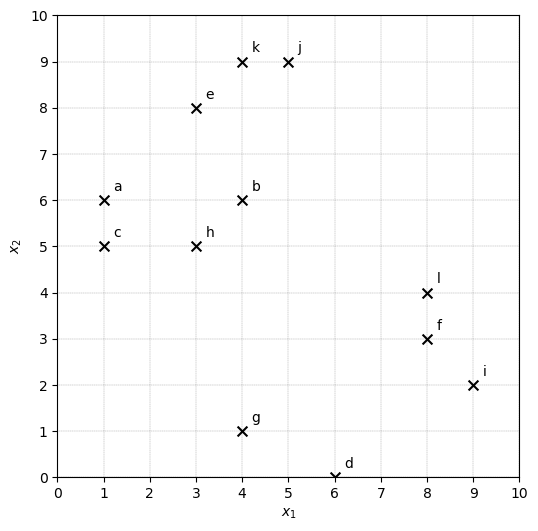

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:,1],
           marker='x', color='k', s=50, zorder=100)  # plot points with 'x' marker

# Add labels to each point
for i, txt in enumerate(labels):
    ax.annotate(txt, (X[i,0] + 0.2, X[i,1] + 0.2))

ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xticks(np.arange(11))
ax.set_yticks(np.arange(11))
ax.grid(ls='--', lw=0.25, color=[0.5,0.5,0.5])  # add light grid lines
ax.set_box_aspect(1)  # equal aspect ratio

## Compute pairwise distance matrix

In [9]:
pairwise_distances = distance_matrix(X, X)  # Euclidean distance between all pairs

<Axes: >

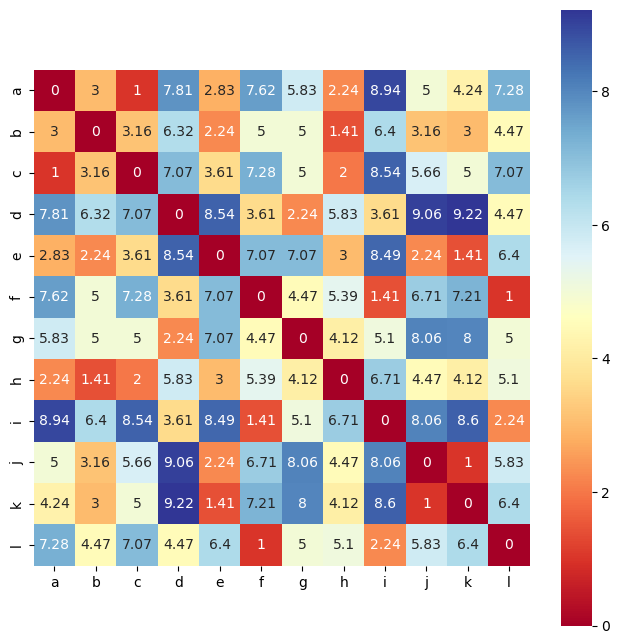

In [10]:
# Visualize pairwise distances as heatmap
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(pairwise_distances, 
            cmap='RdYlBu', square=True, 
            annot=True, fmt='.3g',
            xticklabels=labels, yticklabels=labels,
            ax=ax)

## Plot hierarchical dendrogram using single linkage

In [12]:
tree = linkage(X, method='single')  # compute hierarchical clustering linkage

Text(0, 0.5, 'Distance')

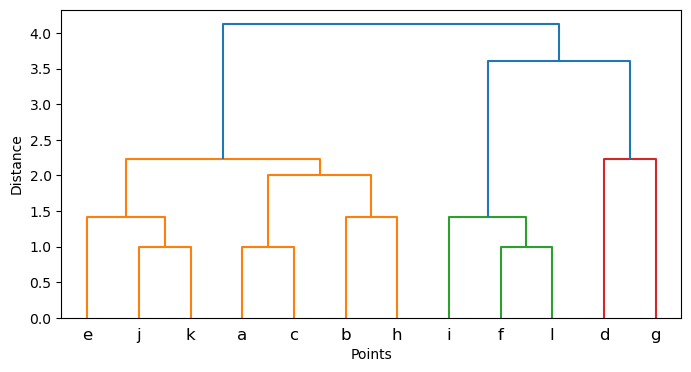

In [13]:
plt.figure(figsize=(8, 4))
dendrogram(tree, labels=labels)
plt.xlabel("Points")
plt.ylabel("Distance")

C:\Users\james\anaconda3\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\james\anaconda3\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


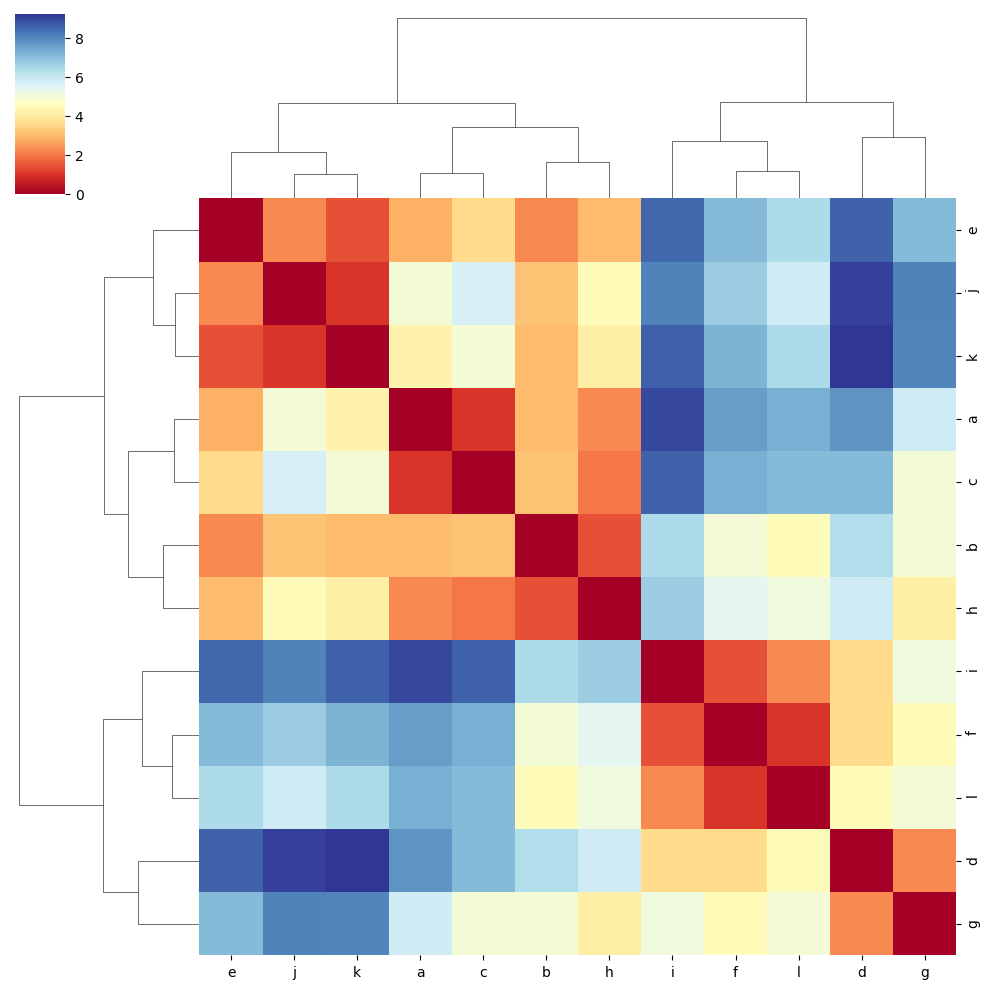

In [14]:
# Optional: cluster map using Seaborn
sns.clustermap(pairwise_distances, 
               cmap='RdYlBu', 
               xticklabels=labels, yticklabels=labels)

## Agglomerative Hierarchical Clustering

In [16]:
cluster = AgglomerativeClustering(n_clusters=2, 
                                  metric='euclidean', 
                                  linkage='single')  # define clustering model

# Fit the model and predict cluster labels
Z = cluster.fit_predict(X)

In [17]:
Z  # display predicted cluster labels

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

## Visualization

<bound method _AxesBase.grid of <Axes: xlabel='$x_1$', ylabel='$x_2$'>>

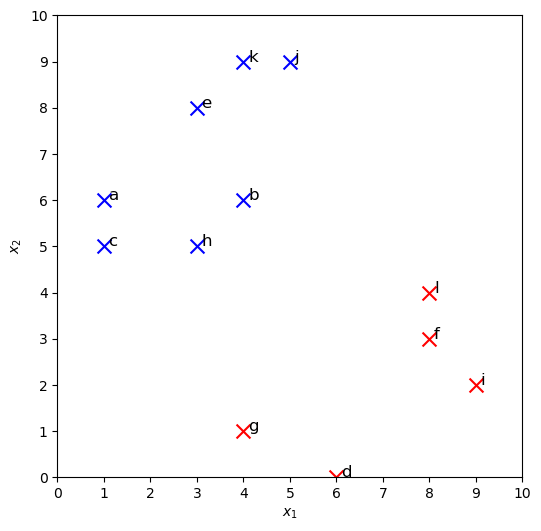

In [19]:
colors = ['red', 'blue']  # colors for each cluster

# Scatter plot colored by cluster assignment
fig, ax = plt.subplots(figsize=(6, 6))

for i, label in enumerate(labels):
    plt.scatter(X[i, 0], X[i, 1], marker='x', color=colors[Z[i]], s=100)
    plt.text(X[i, 0] + 0.1, X[i, 1], label, fontsize=12)

ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xticks(np.arange(11))
ax.set_yticks(np.arange(11))
ax.grid